In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the dataset into a dataframe
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 1. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.shape

(301, 9)

### 1.1 Missing Data

In [6]:
#Let's see the percentage of missing values in each feature
features = df.columns
for feature in features:
    print(feature,':',df[feature].isnull().mean()*100,'% missing values')

Car_Name : 0.0 % missing values
Year : 0.0 % missing values
Selling_Price : 0.0 % missing values
Present_Price : 0.0 % missing values
Kms_Driven : 0.0 % missing values
Fuel_Type : 0.0 % missing values
Seller_Type : 0.0 % missing values
Transmission : 0.0 % missing values
Owner : 0.0 % missing values


### 1.2 Numerical Data

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
print('Number of numerical features:',len(numerical_features))
df[numerical_features].head()

Number of numerical features: 5


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


<AxesSubplot:>

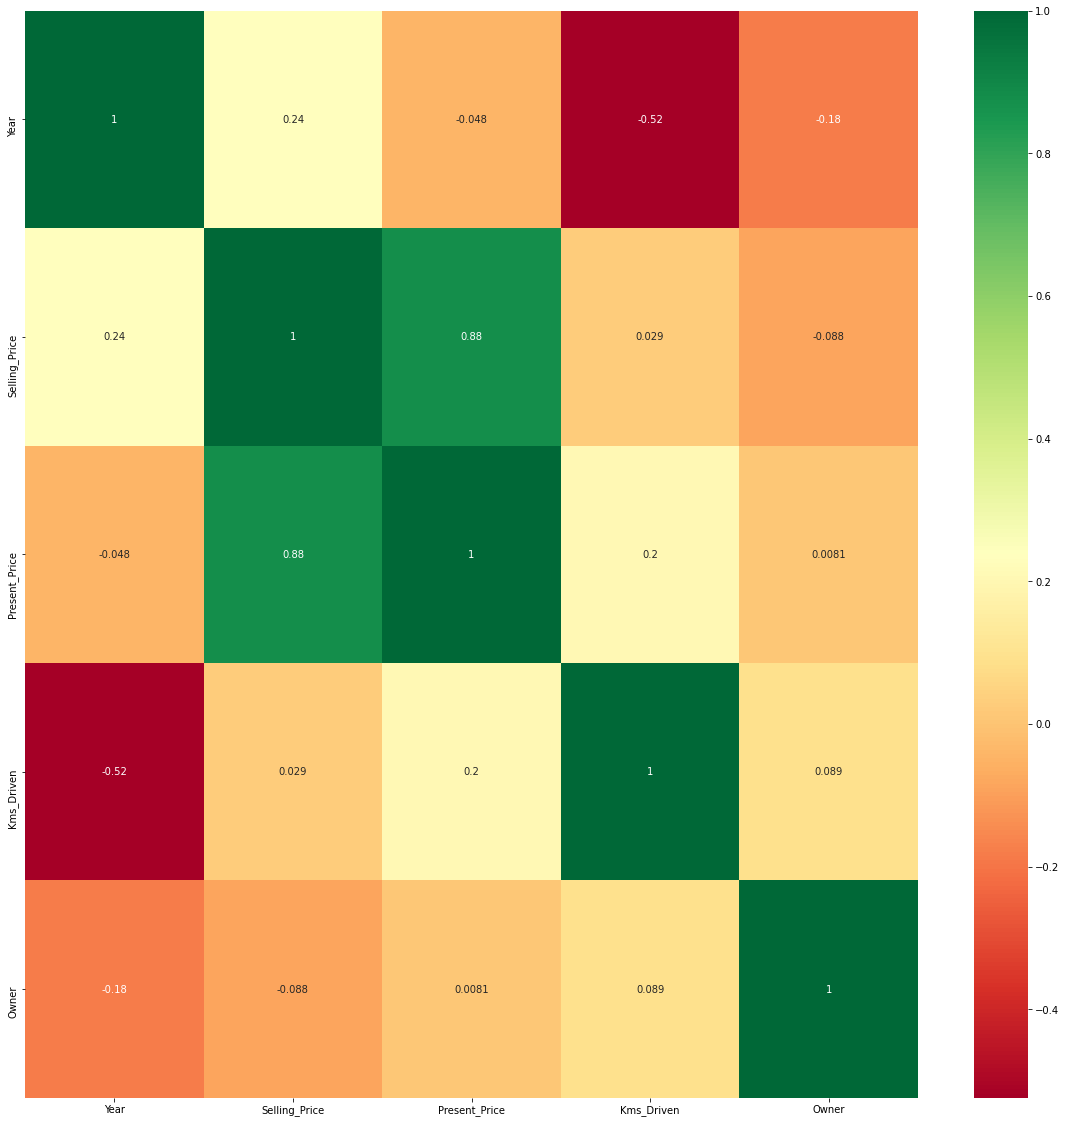

In [8]:
#let's see how these features influence the target variable Selling_Price
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

#### Observations: We can see that Selling_Price is highly correalted with Present_Price

In [9]:
#The Year column doesn't give much information regarding how old the car is.
#We'll create a new feature called Current_Year through which we can determine how old the car is by subtracting Year.
df['Current_Year'] = 2020
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [10]:
df['Age_of_Car'] = df['Current_Year']-df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age_of_Car
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [11]:
df.drop(columns=['Year','Current_Year'],axis=1,inplace=True)

In [12]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


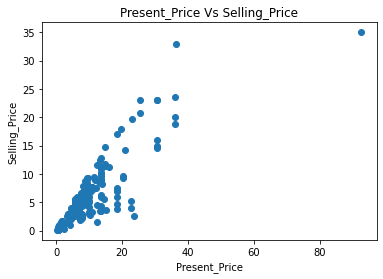

In [13]:
plt.scatter(df['Present_Price'],df['Selling_Price'])
plt.title('Present_Price Vs Selling_Price')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.show()

Almost a linear relationship of Present_Price with SalePrice

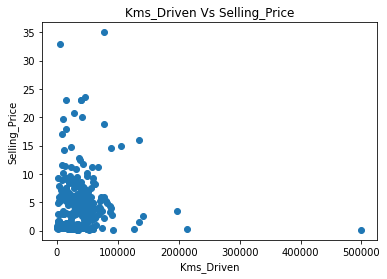

In [14]:
plt.scatter(df['Kms_Driven'],df['Selling_Price'])
plt.title('Kms_Driven Vs Selling_Price')
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.show()

Maximum number of cars sold were driven between 0-100000kms. Few outliers present

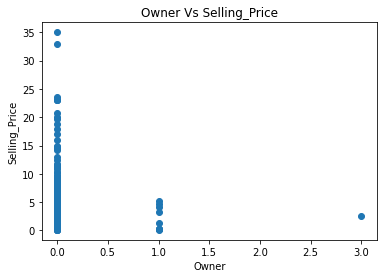

In [15]:
plt.scatter(df['Owner'],df['Selling_Price'])
plt.title('Owner Vs Selling_Price')
plt.xlabel('Owner')
plt.ylabel('Selling_Price')
plt.show()

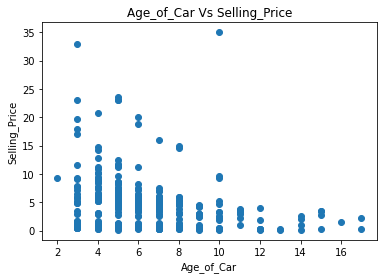

In [16]:
plt.scatter(df['Age_of_Car'],df['Selling_Price'])
plt.title('Age_of_Car Vs Selling_Price')
plt.xlabel('Age_of_Car')
plt.ylabel('Selling_Price')
plt.show()

Older cars (>10 years) sell at a low price compared to cars which are 2-4 years old

c:\users\mahe\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


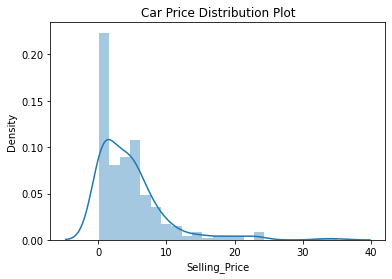

In [17]:
sns.distplot(df['Selling_Price'])
plt.title('Car Price Distribution Plot')
plt.show()

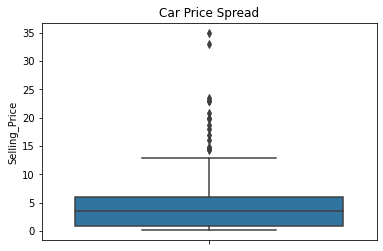

In [18]:
sns.boxplot(y=df['Selling_Price'])
plt.title('Car Price Spread')
plt.show()

#### Obseravtions: The plot is bit skewed to the right meaning most of the selling price of cars is below 5 Lacs. The datapoints are far spread out from the mean which indicates high variance in the selling price.

In [19]:
print(df['Selling_Price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
85%        8.250000
90%        9.500000
100%      35.000000
max       35.000000
Name: Selling_Price, dtype: float64


85% of the selling price of cars are below 8.25 Lacs whereas the remaining 15% are between 9.25 Lacs and 35 Lacs

### 1.3 Categorical  Data

In [20]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical features:',len(categorical_features))
df[categorical_features].head()

Number of categorical features: 4


,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


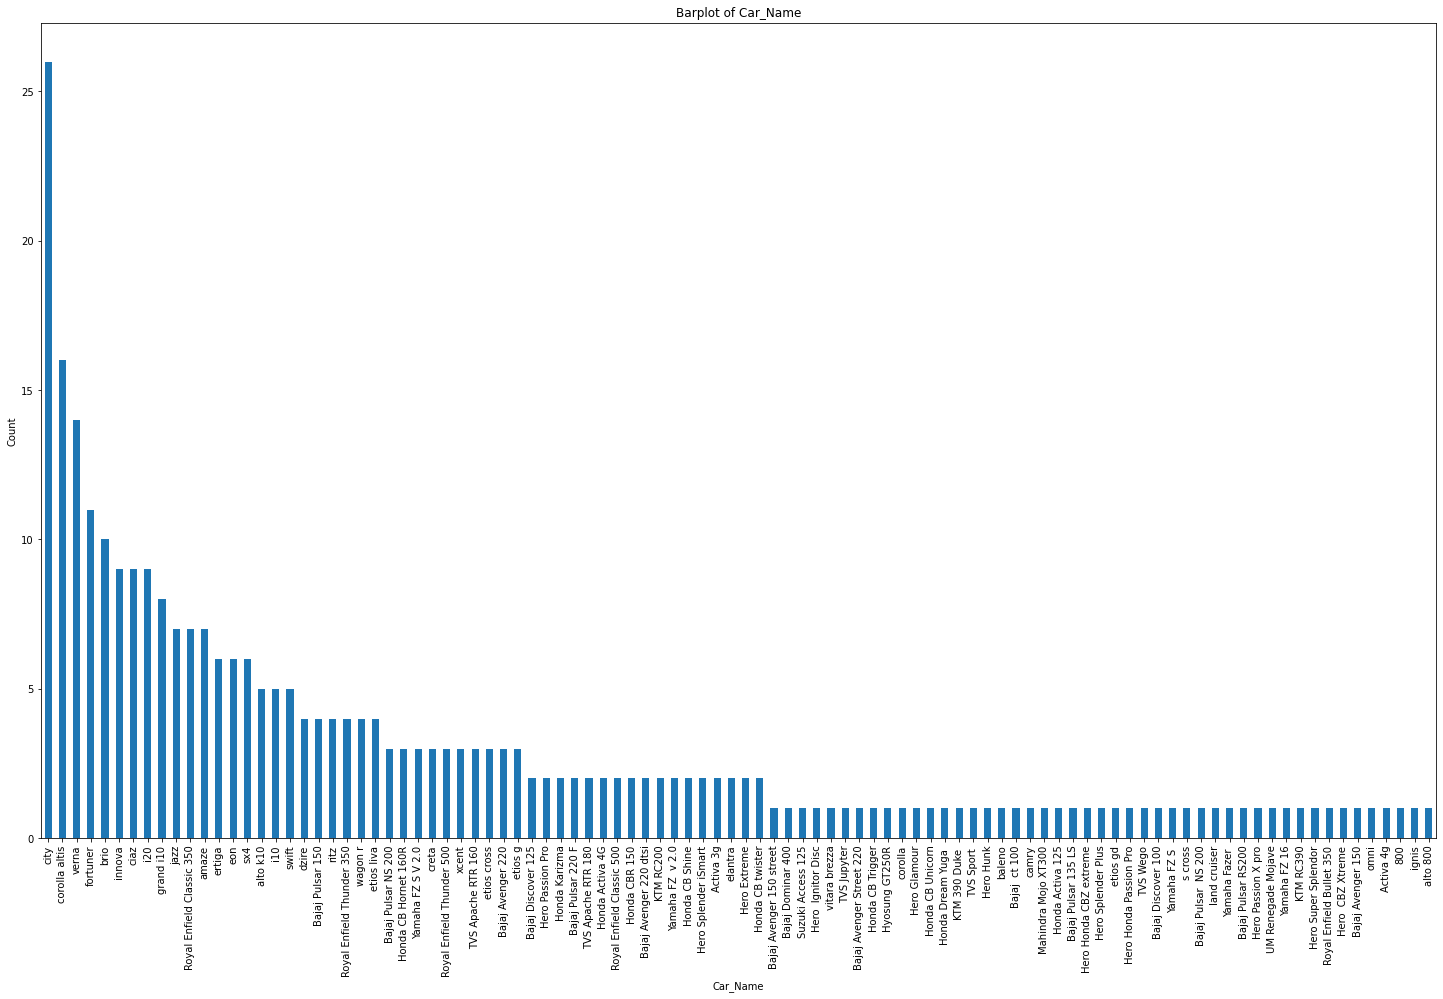

In [21]:
#let's try to visualize these features
plt.figure(figsize=(25,15))
df['Car_Name'].value_counts().plot.bar()
plt.xlabel('Car_Name')
plt.ylabel('Count')
plt.title('Barplot of Car_Name')
plt.show()

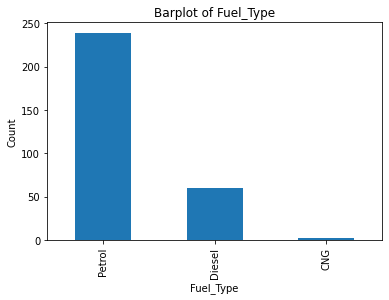

In [22]:
df['Fuel_Type'].value_counts().plot.bar()
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
plt.title('Barplot of Fuel_Type')
plt.show()

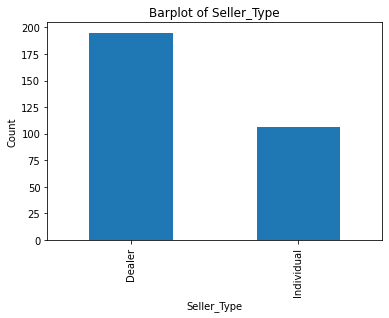

In [23]:
df['Seller_Type'].value_counts().plot.bar()
plt.xlabel('Seller_Type')
plt.ylabel('Count')
plt.title('Barplot of Seller_Type')
plt.show()

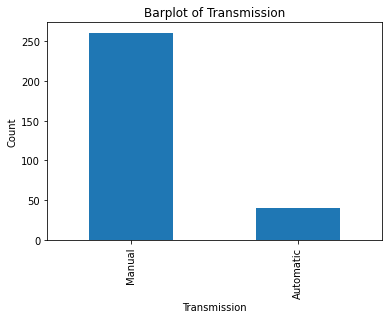

In [24]:
df['Transmission'].value_counts().plot.bar()
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Barplot of Transmission')
plt.show()

#### Observations: Honda City seems to be the most popular car for sale. Petrol cars are more in number, Manual cars are more in number compared to automatic cars.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

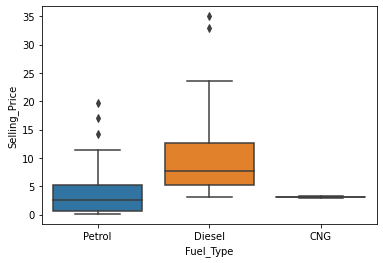

In [25]:
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=df)

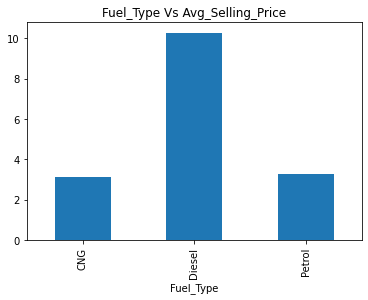

In [26]:
df.groupby('Fuel_Type')['Selling_Price'].mean().plot.bar()
plt.title('Fuel_Type Vs Avg_Selling_Price')
plt.show()

Diesel Cars seem to have the highest price range while Petrol and CNG cars have identical average price.

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

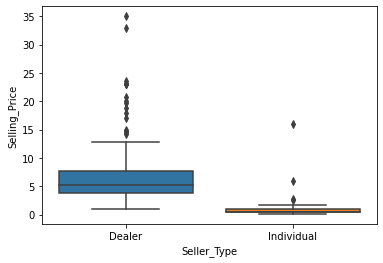

In [27]:
sns.boxplot(x='Seller_Type',y='Selling_Price',data=df)

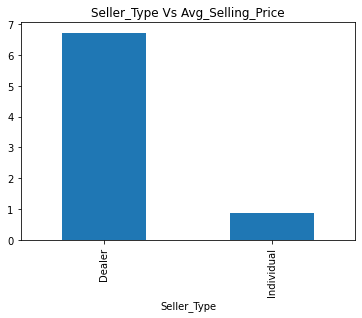

In [28]:
df.groupby('Seller_Type')['Selling_Price'].mean().plot.bar()
plt.title('Seller_Type Vs Avg_Selling_Price')
plt.show()

Cars sold by Dealers have a higher Selling Price on average

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

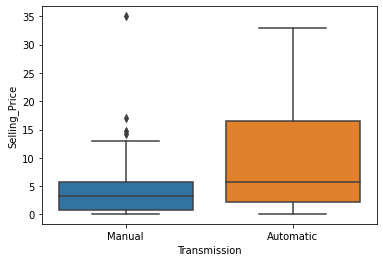

In [29]:
sns.boxplot(x='Transmission',y='Selling_Price',data=df)

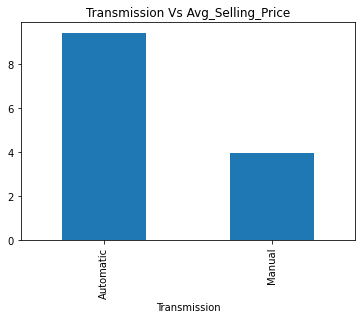

In [30]:
df.groupby('Transmission')['Selling_Price'].mean().plot.bar()
plt.title('Transmission Vs Avg_Selling_Price')
plt.show()

Automatic cars have a higher Selling Price on average

## 2. Feature Engineering

In [31]:
#Car_Name doesn't seem to be a good predictor for Selling_Price, therefore we'll drop it entirely.
df.drop('Car_Name',axis=1,inplace=True)

In [32]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [33]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age_of_Car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


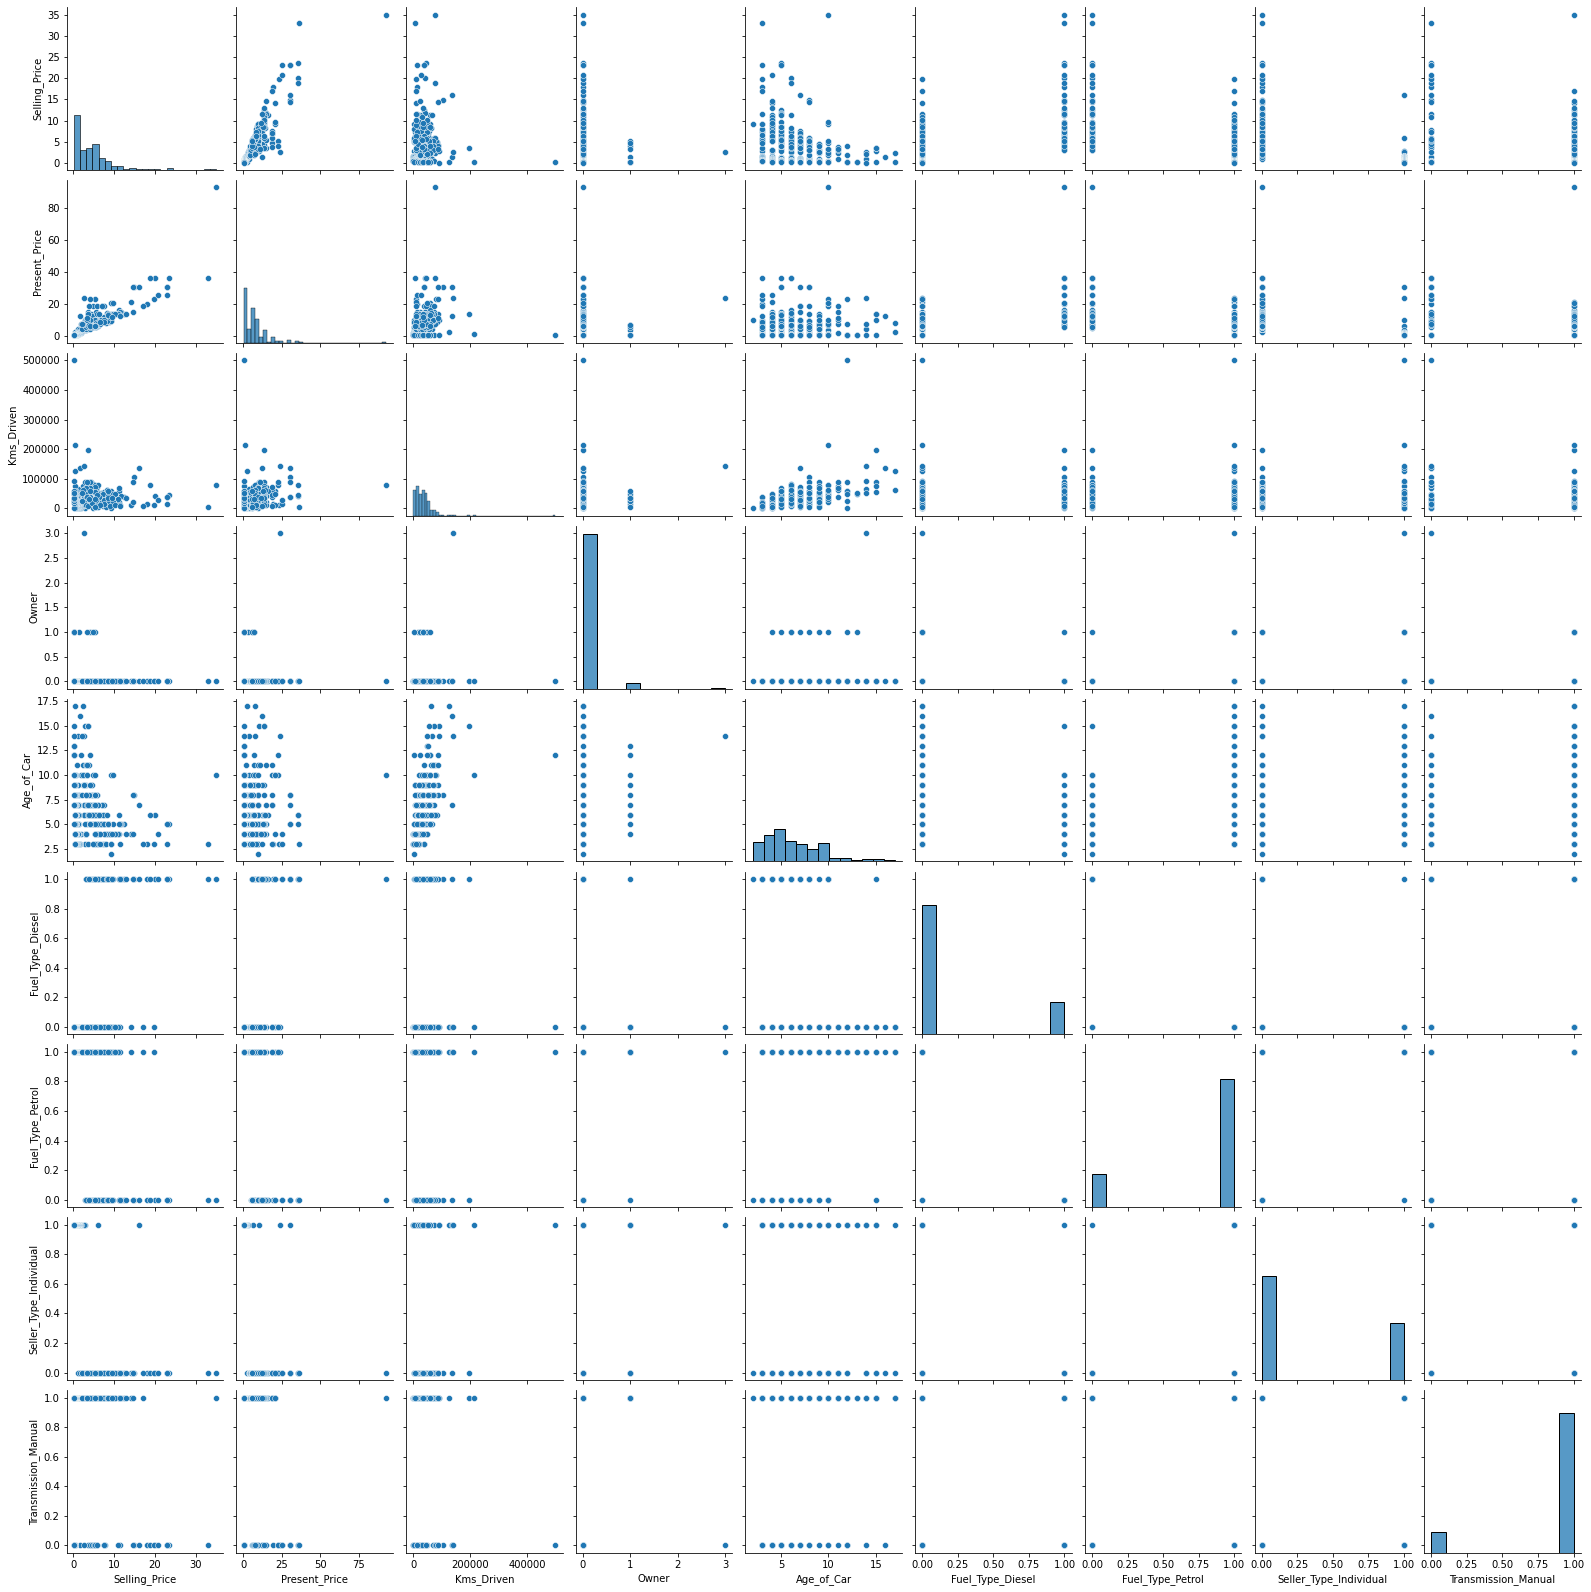

In [34]:
sns.pairplot(df)

<AxesSubplot:>

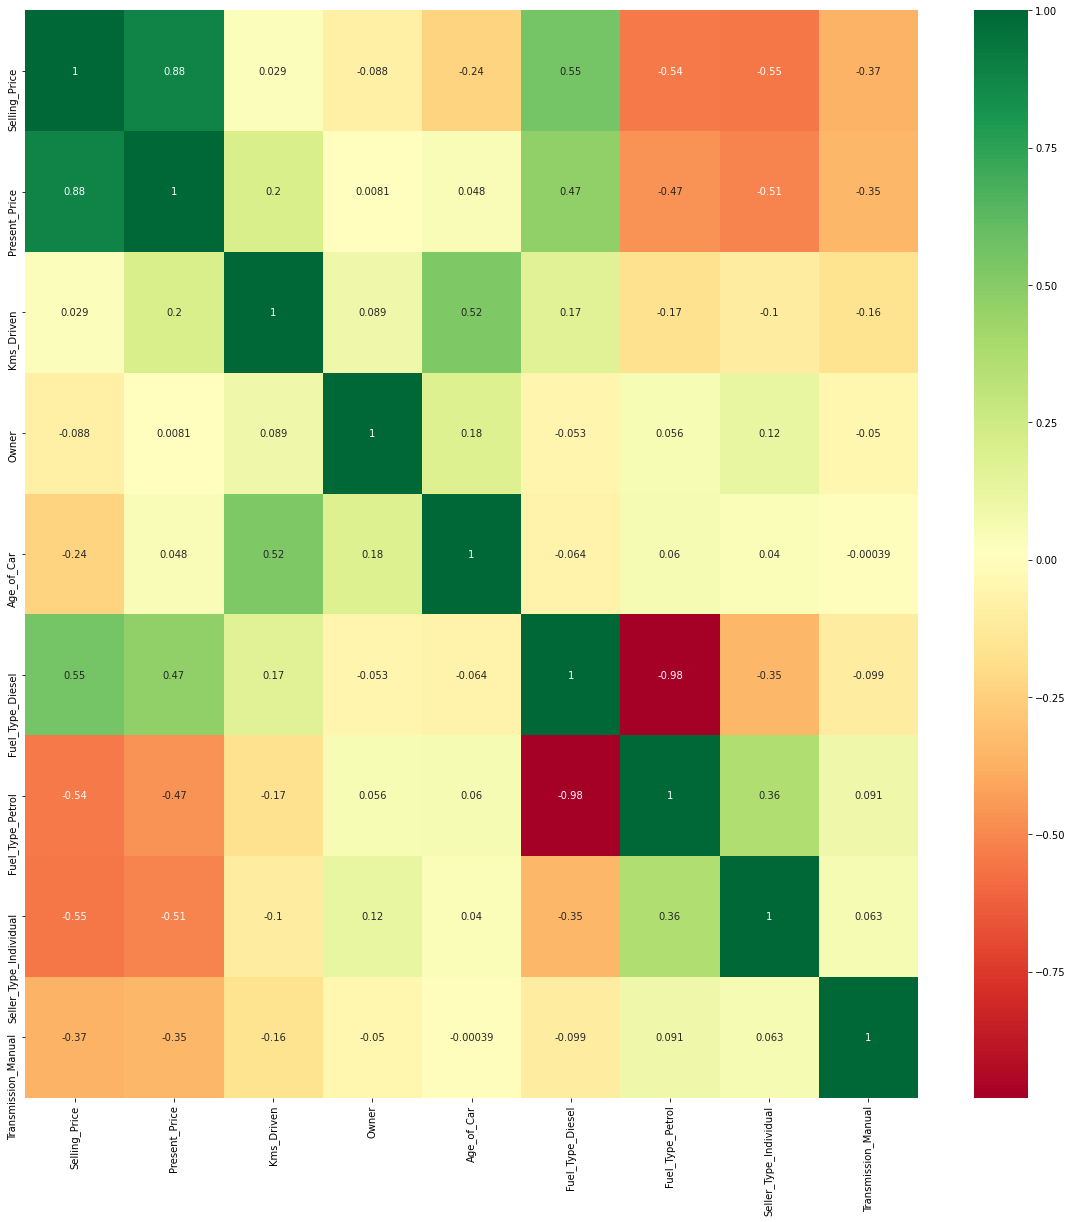

In [35]:
#Finally let's see the hatmap of our final dataset
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

In [36]:
#Seperating our dataset into dependent and independent features
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [37]:
X.head()

,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [38]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [39]:
#Feaure Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[0.4029888  0.04147669 0.00135911 0.07564477 0.21529273 0.01105355
 0.12799464 0.12418971]


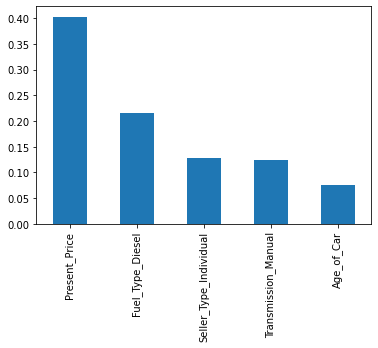

In [41]:
#Let's plot the graph of Feature Importances for better visualization.
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot.bar()
plt.show()

In [42]:
#Splitting the model into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [43]:
X_train.shape

(210, 8)

In [44]:
X_test.shape

(91, 8)

## 3. Model Building

#### 3.1 Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [46]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.8517983059778264

In [47]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-4.321206268685382


c:\users\mahe\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Error Distribution')

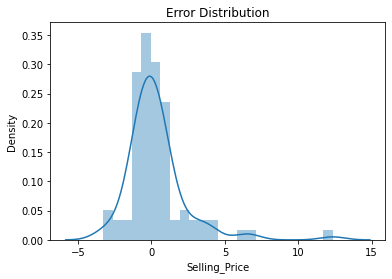

In [48]:
sns.distplot(y_test-y_pred)
plt.title('Error Distribution')

The errors seem to be almost normally distributed. So the assumption of Linear Modelling holds good.

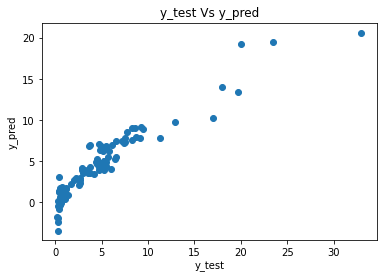

In [49]:
plt.scatter(y_test,y_pred)
plt.title('y_test Vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

#### 3.2 RandomForest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [51]:
#Hyperparameter optimization using RandomizedSearchCV

#Number of trees in the model
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#Number of features to consider at every split
max_features = ['auto','sqrt']

#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]

#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [52]:
from sklearn.model_selection import RandomizedSearchCV
#Create the random grid

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter=10,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=1)

In [54]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
predictions = rf_random.predict(X_test)

In [56]:
score = r2_score(y_test,predictions)
score

0.862730879424298

In [57]:
mse = cross_val_score(rf_random,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.6s
[CV] END max_depth=25, max_features

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.5s
[CV] END max_depth=5, max_features=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_fea

c:\users\mahe\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


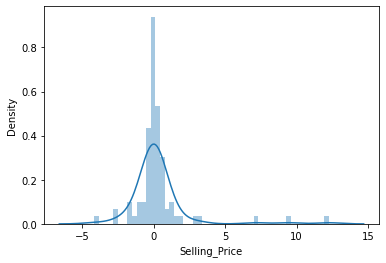

In [58]:
sns.distplot(y_test-predictions)
plt.show()

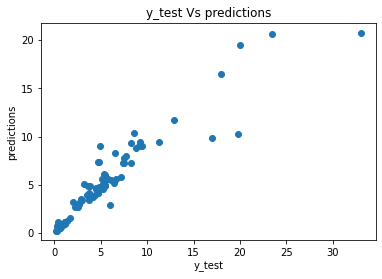

In [59]:
plt.scatter(y_test,predictions)
plt.title('y_test Vs predictions')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

RandomForest seems to perform better therefore, we will be using it over LinearRegression

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8952546153846179
MSE: 4.105178104211669
RMSE: 2.026123911366644


## 4. Pickle File

In [61]:
import pickle
file = open('random_forest_regression_model','wb')
pickle.dump(rf_random,file)